In [2]:
from numpy.random import normal, uniform
from sklearn.preprocessing import MinMaxScaler
from numpy import array, linspace, savetxt, where, isinf, mean, std, append, array_split, arange, concatenate, vstack, prod, argmin, median, zeros, dot
from scipy.io import loadmat, savemat
from scipy.stats import norm
from math import sqrt, exp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn import metrics
plt.rcParams["figure.figsize"] = [16,8]
import seaborn as sns
sns.set_style("darkgrid")
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from sklearn.mixture import GaussianMixture

# random number generator
from numpy.random import seed, choice
import random
import numpy as np
seed(1)

In [3]:
boston_data = loadmat('boston_dataset_data')['boston_dataset_data']
boston_data.shape

(506, 12)

In [4]:
data_scaler = MinMaxScaler(feature_range = (-1,1))
data_scaler.fit(boston_data)
boston_data_scaled = data_scaler.transform(boston_data)

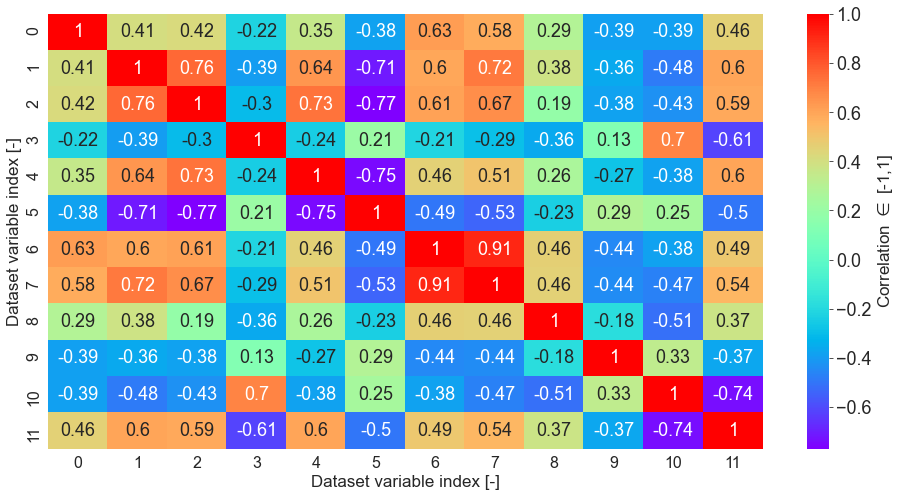

In [21]:
correlation_matrix = np.corrcoef(boston_data_scaled.T)
ax = sns.heatmap(correlation_matrix, square=False, annot = True, cmap= 'rainbow', 
            cbar_kws={'label': r'Correlation $\in$ [-1,1]'}, annot_kws={"size":18});
plt.ylabel('Dataset variable index [-]', fontsize=17)
plt.xlabel('Dataset variable index [-]', fontsize=17);
plt.tick_params(labelsize=16);
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)

In [23]:
original_data_describe = pd.DataFrame(boston_data).describe().round(2)
original_data_describe

,0,1,2,3,4,5,6,7,8,9,10,11
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.14,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,22.53,12.65
std,8.60,6.86,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,9.20,7.14
min,0.01,0.46,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,5.00,1.73
25%,0.08,5.19,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,17.02,6.95
50%,0.26,9.69,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,21.20,11.36
75%,3.68,18.10,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,25.00,16.96
max,88.98,27.74,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,50.00,37.97


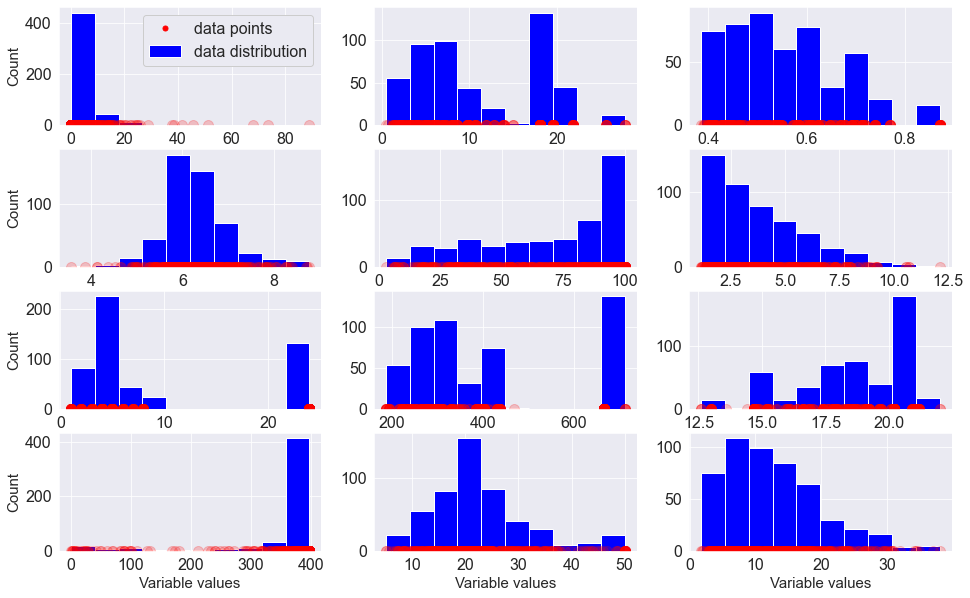

In [60]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(4,3);

ind = 0

for i in range(4):
    for j in range(3):
        axs[i,j].hist(boston_data[:,ind], density = False, color = 'blue', alpha = 1, label = 'data distribution')
        axs[i,j].plot(boston_data[:,ind], [0]*len(boston_data[:,ind]), 'o', markersize = 10, alpha = 0.2, color = 'red')
        ind += 1
        axs[i,j].set_xlabel('Variable values'.format(ind) if i == 3 else None, fontsize=15);
        axs[i,j].set_ylabel('Count' if j == 0 else None, fontsize=15);
        axs[i,j].tick_params(labelsize = 16);
axs[0,0].plot([0], [0], 'o', markersize = 5, alpha = 1, color = 'red', label = 'data points')
axs[0,0].legend(fontsize=16, framealpha = 1, loc = 'upper right');
#fig.suptitle('Model fit, # of Gaussian components', fontsize = 18);
#fig.tight_layout();

In [74]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 0.00001, min_samples = 5).fit(boston_data_scaled)
print(clustering.labels_)
number_od_clusters = max(clustering.labels_) + 1
number_od_clusters

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

0

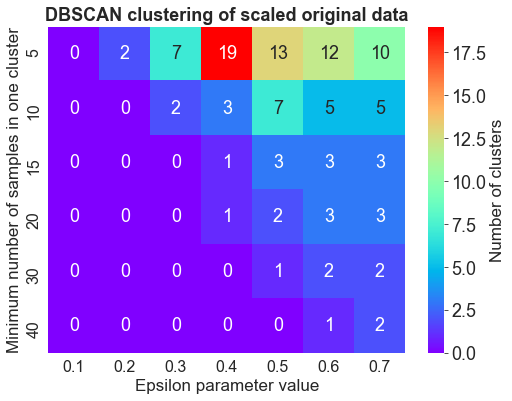

In [128]:
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
samples_values = [5, 10, 15, 20, 30, 40]

clusters_matrix = []

for eps in epsilon_values:
    vector = []
    for min_samples in samples_values:
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(boston_data_scaled)
        number_od_clusters = max(clustering.labels_) + 1
        vector.append(number_od_clusters)
    clusters_matrix.append(vector)
clusters_matrix = array(clusters_matrix)

plt.rcParams["figure.figsize"] = [8,6]
ax = sns.heatmap(clusters_matrix.T, annot = True, cmap= 'rainbow', 
                 xticklabels = epsilon_values, yticklabels = samples_values,
                 cbar_kws={'label': 'Number of clusters'}, annot_kws={"size":18});
plt.ylabel('Minimum number of samples in one cluster', fontsize=17)
plt.xlabel('Epsilon parameter value', fontsize=17);
plt.tick_params(labelsize=16);
plt.title('DBSCAN clustering of scaled original data', fontsize = 18, fontweight = 'bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)
plt.rcParams["figure.figsize"] = [16,10]